In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [7]:
# Load data for high growth stocks 
df = pd.read_csv(r"C:/Users/Owner/portfolio_data.csv")
df.tail()

,Date,AMZN,DPZ,BTC,NFLX
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010
1519,5/14/2019,1840.119995,272.859985,8183.830078,345.609985


## 1. What was the change in price of the stock overtime?

In [8]:
# The stocks we'll use for this analysis
tech_list = ['AMZN', 'DPZ', 'BTC', 'NFLX']

In [9]:
# Set End and Start date/time for data load
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [11]:
# Load Yahoo finance data and set as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [19]:
company_list = [AMZN, DPZ, BTC, NFLX]
company_name = ["AMAZON","DOMINOS","BITCOIN","NETFLIX"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-01-14,538.369995,511.880005,517.599976,525.690002,7849400.0,525.690002,NETFLIX
2022-01-18,521.750000,508.679993,520.080017,510.799988,4839100.0,510.799988,NETFLIX
2022-01-19,523.210022,510.510010,515.000000,515.859985,4353500.0,515.859985,NETFLIX
2022-01-20,526.640015,506.929993,517.750000,508.250000,12659000.0,508.250000,NETFLIX
2022-01-21,409.149994,379.989990,400.429993,397.500000,58824800.0,397.500000,NETFLIX
2022-01-24,387.260010,351.459991,383.910004,387.149994,32386800.0,387.149994,NETFLIX
2022-01-25,387.709991,365.130005,379.140015,366.420013,15145800.0,366.420013,NETFLIX
2022-01-26,382.660004,356.619995,378.269989,359.700012,12684000.0,359.700012,NETFLIX
2022-01-27,394.799988,378.100006,382.059998,386.700012,24301000.0,386.700012,NETFLIX


In [20]:
# Summarizing Statistics for Amazon
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,3373.581506,3303.826510,3340.349530,3337.517580,3.390786e+06,3337.517580
std,174.036013,176.545809,173.519616,175.711732,1.228782e+06,175.711732
min,2872.000000,2707.040039,2780.000000,2777.449951,1.680300e+06,2777.449951
25%,3276.530029,3213.962524,3243.215027,3242.559998,2.560975e+06,3242.559998
50%,3374.910034,3305.994995,3347.974976,3342.375000,3.139700e+06,3342.375000
75%,3483.845032,3415.632507,3452.164978,3448.374939,3.835475e+06,3448.374939
max,3773.080078,3696.790039,3744.000000,3731.409912,9.957100e+06,3731.409912


In [21]:
# General information about Amazon
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-02-01 to 2022-01-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


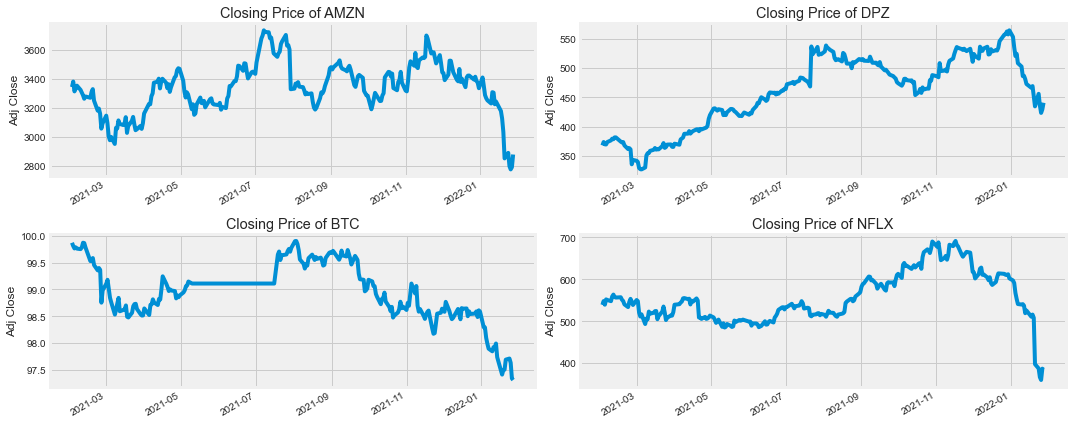

In [22]:
# Historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

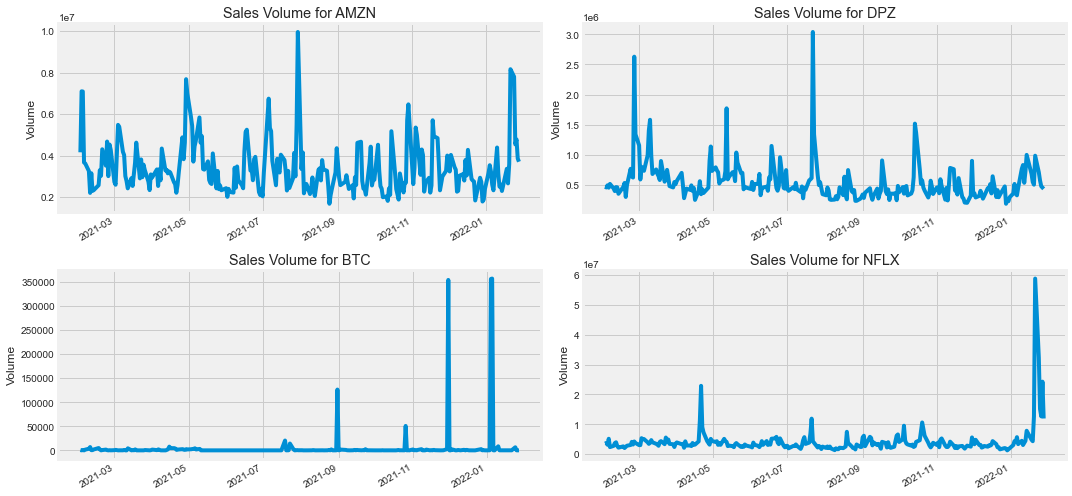

In [23]:
# The total volume of stock being traded for each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## 2. What was the moving average of the various stocks?

In [24]:
# Moving average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

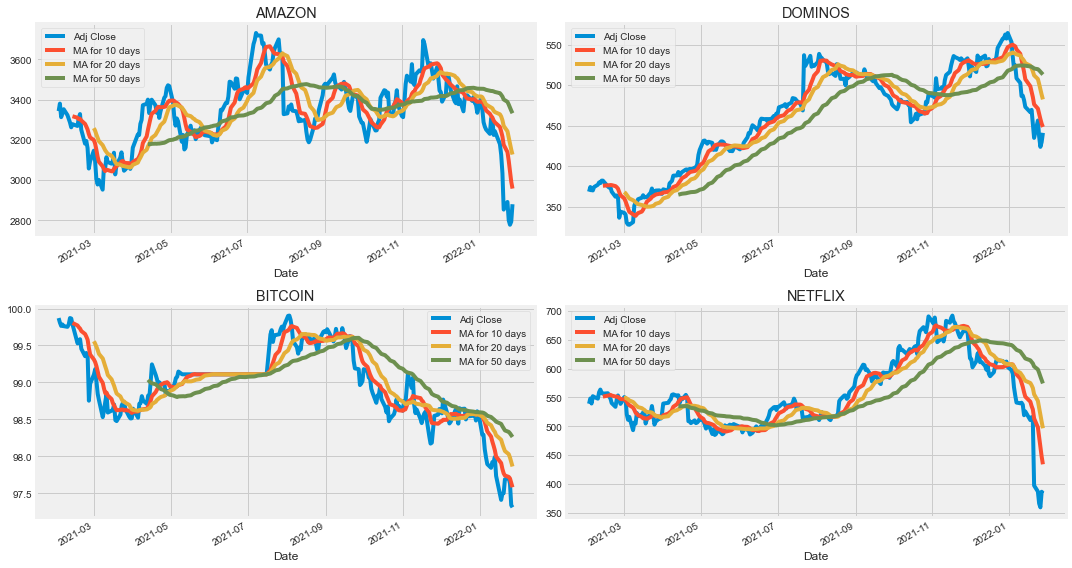

In [26]:
# Plotting the additional Moving Averages
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AMAZON')

DPZ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('DOMINOS')

BTC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BITCOIN')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NETFLIX')

fig.tight_layout()

## 3. What was the daily return of the stock on average?

In [32]:
# What is the risk of a stock? We need to look at daily changes rather
# than evaluating absolute values. Begin by looking at Amazon stocks.

In [28]:
# The pct_change will determine the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

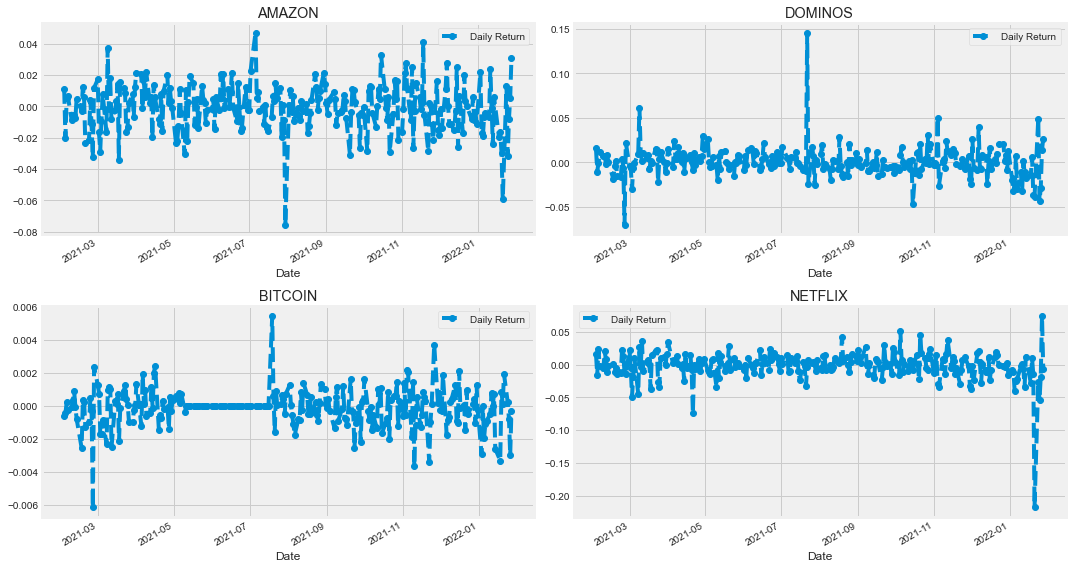

In [29]:
# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AMZN['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AMAZON')

DPZ['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('DOMINOS')

BTC['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('BITCOIN')

NFLX['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('NETFLIX')

fig.tight_layout()

In [30]:
# An overall look at the average daily return requires a histogram. 
# Seaborn will create a histogram and a kde plot on the same figure. 

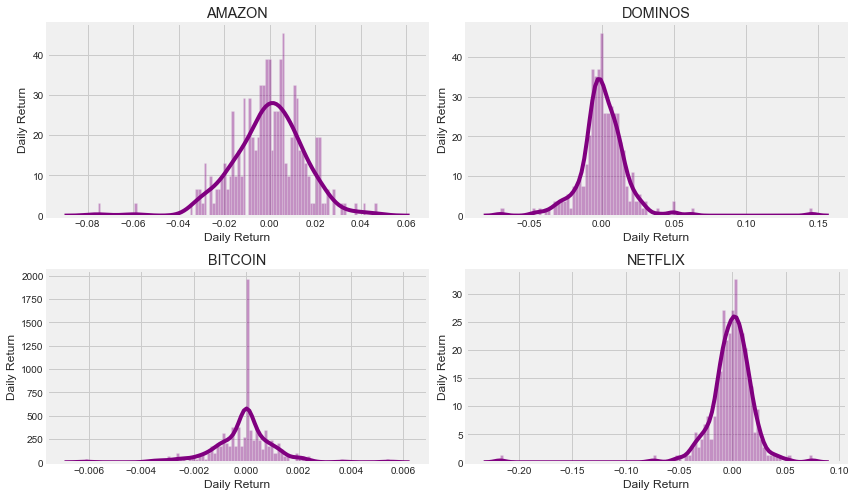

In [33]:
# Dropna() is used here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

# Could have also done:
#AMZN['Daily Return'].hist()
plt.tight_layout()

## 4. What was the correlation between different stocks closing prices?

In [34]:
# Analyze the returns of all the stocks in the given list 
# Starts with building a Datarame with the Close columns of each datafr

In [35]:
# The closing prices for the stocks list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AMZN,DPZ,BTC,NFLX
Date,,,,
2021-02-01,3342.879883,368.351654,99.871002,539.039978
2021-02-02,3380.000000,374.103699,99.809601,548.159973
2021-02-03,3312.530029,370.245850,99.764999,539.450012
2021-02-04,3331.000000,369.918610,99.785004,552.159973
2021-02-05,3352.149902,374.113647,99.761597,550.789978


In [37]:
# Find the daily returns for all the stocks
# A new tech returns DataFrame is created
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AMZN,DPZ,BTC,NFLX
Date,,,,
2021-02-01,NaN,NaN,NaN,NaN
2021-02-02,0.011104,0.015616,-0.000615,0.016919
2021-02-03,-0.019962,-0.010312,-0.000447,-0.015889
2021-02-04,0.005576,-0.000884,0.000201,0.023561
2021-02-05,0.006349,0.011340,-0.000235,-0.002481


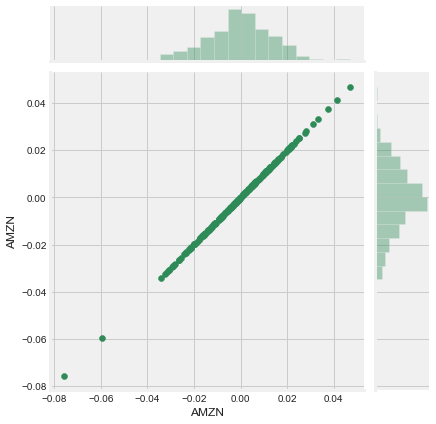

In [38]:
# Let's compare compare the daily percentage return of two stocks to check how correlated
# Comparing Amazon to itself should show a perfectly linear relationship
sns.jointplot('AMZN', 'AMZN', tech_rets, kind='scatter', color='seagreen')

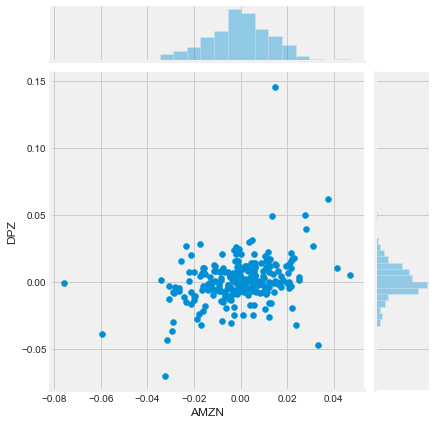

In [39]:
# We'll use joinplot to compare the daily returns of Amazon and Dominos
sns.jointplot('AMZN', 'DPZ', tech_rets, kind='scatter')

In [40]:
# When two stocks are positively correlated with each other a linear 
# relationship between its daily returns can occur. We can do this
# combo for all stocks, use sns.pairplot(). 

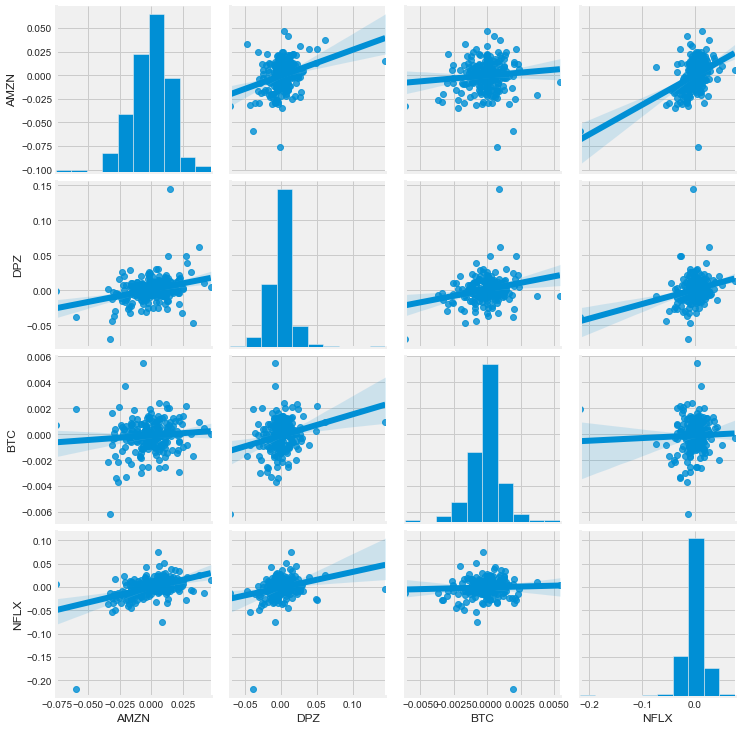

In [41]:
# Call pairplot on the DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

In [42]:
# Highest correlation is between the Amazon and Netflix daily returns. 

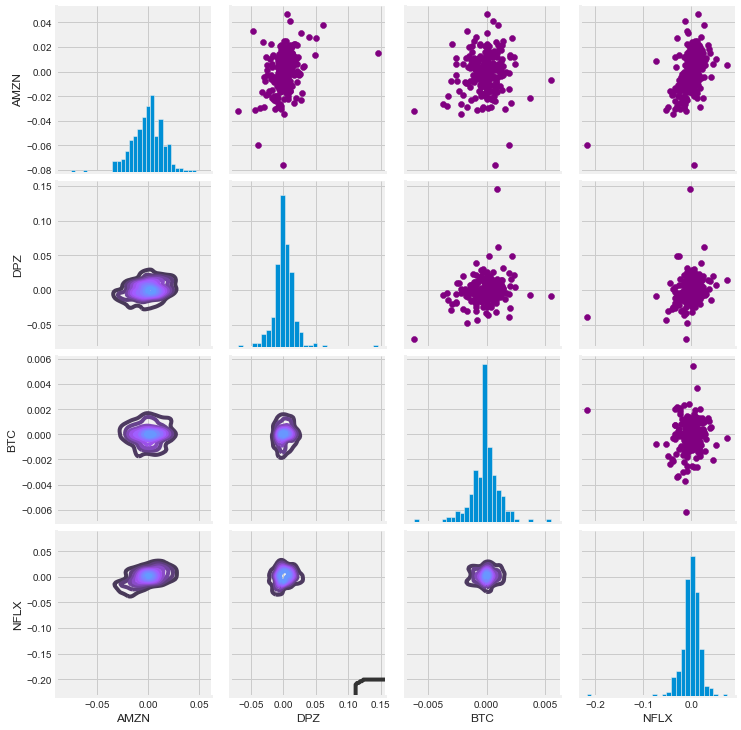

In [43]:
# Set up the figure by naming it return_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper it can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle in the figure, including the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

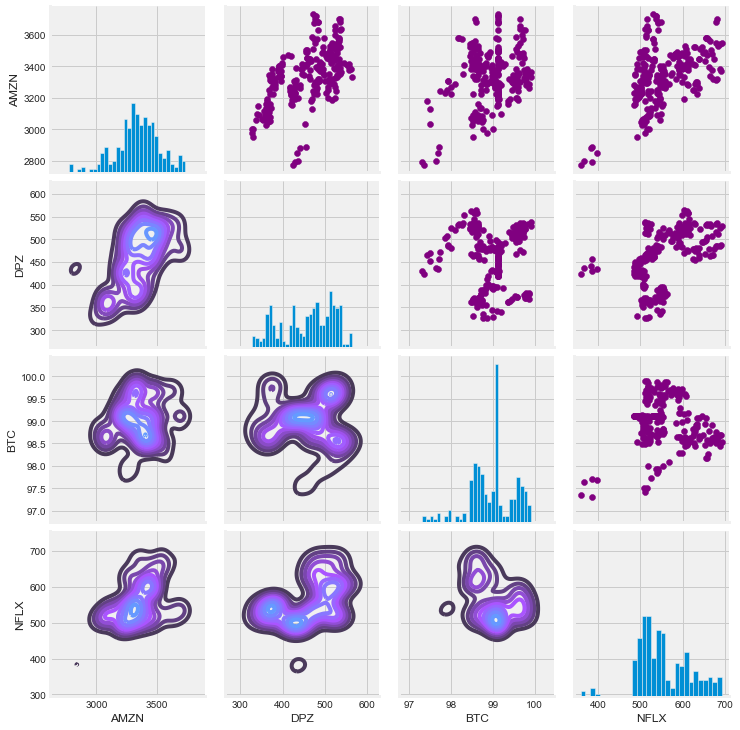

In [44]:
# Set up the figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

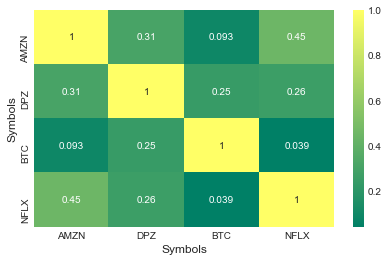

In [46]:
# A correlation plot would allow us to get numerical values for the 
# daily stocks return values. By comparing the closing prices, we see 
# between Amazon and Netflix

# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

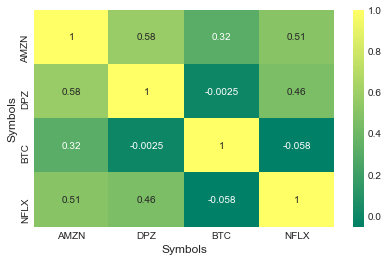

In [49]:
# For closing values - we see here numerically and visually that 
# Netflix/Amazon had the strongest correlation of daily stock return
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## 5. How much value do we put at risk by investing in a particular stock?

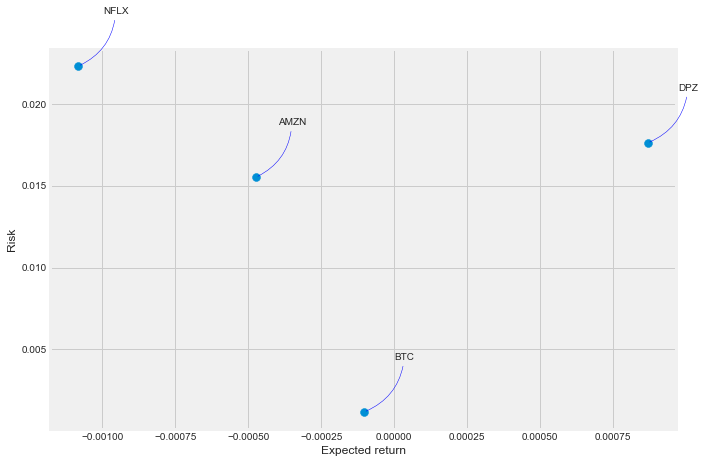

In [50]:
# Quantifying risks - use the daily % returns by comparing the expected
# returns with the standard deviations of the daily returns 

# Define a new DataFrame as a clenaed version of the orignal tech_rets 
# DataFrame
rets = tech_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## 6. Predicting the closing price stock price of Amazon:

In [51]:
# Get the stock quote
df = DataReader('AMZN', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2022-01-24,2898.899902,2707.040039,2780.000000,2890.879883,7802200,2890.879883
2022-01-25,2872.000000,2762.899902,2844.850098,2799.719971,4541200,2799.719971
2022-01-26,2903.699951,2746.370117,2895.000000,2777.449951,4780100,2777.449951


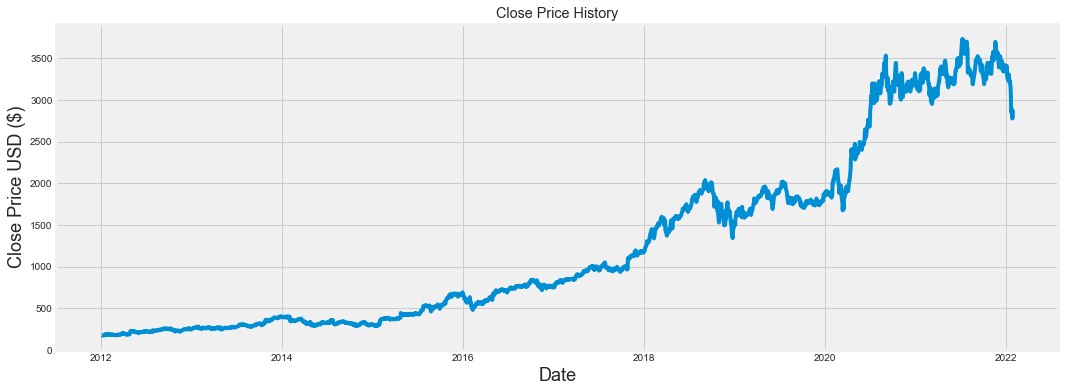

In [52]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [53]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2410

In [54]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.71895264e-04],
       [4.44384968e-04],
       [4.72512283e-04],
       ...,
       [7.31693053e-01],
       [7.35996284e-01],
       [7.60412132e-01]])

In [55]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.00311351,
       0.00333851, 0.00489105, 0.00546762, 0.00456197, 0.00520605,
       0.00099284, 0.00162847, 0.00330476, 0.00202786, 0.00232318,
       0.002686  , 0.00254537, 0.00270287, 0.00440447, 0.00432291,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221349, 0.00105753,
       0.00115596, 0.00094784, 0.00121784, 0.00145128, 0.00220505,
       0.00329351, 0.00235974, 0.00209817, 0.00243568, 0.00178035,
       0.00239068, 0.00256506, 0.00269725, 0.0046126 , 0.00444385,
       0.00463229, 0.0053748 , 0.00757704, 0.00829987, 0.00709609])]
[0.008066423825883726]

[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.0